In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN 
from sklearn.metrics import silhouette_score 
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

df_creditRyo = pd.read_csv('credit_card.csv')
df_creditRyo.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [5]:
print('Data null : \n', df_creditRyo.isnull().sum())
print('Data kosong : \n', df_creditRyo.empty)
print('Data nan : \n', df_creditRyo.isna().sum())

Data null : 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
Data kosong : 
 False
Data nan : 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [6]:
df_creditRyo2 = df_creditRyo.drop(columns=['Customer Key','Sl_No'],axis=1)
df_creditRyo2.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


<Axes: >

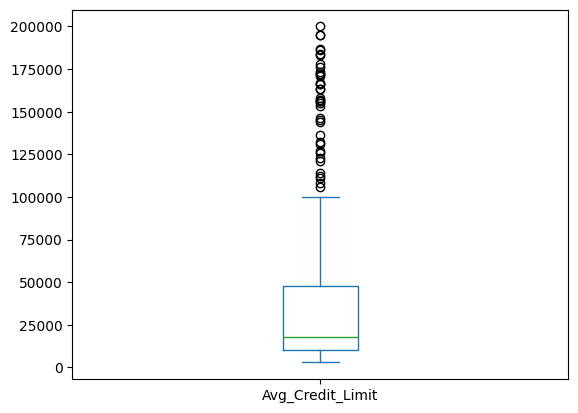

In [7]:
df_creditRyo2['Avg_Credit_Limit'].plot(kind='box')

Jumlah baris DataFrame sebelum dibuang outlier: 660
Jumlah baris DataFrame sesudah dibuang outlier: 621


<Axes: >

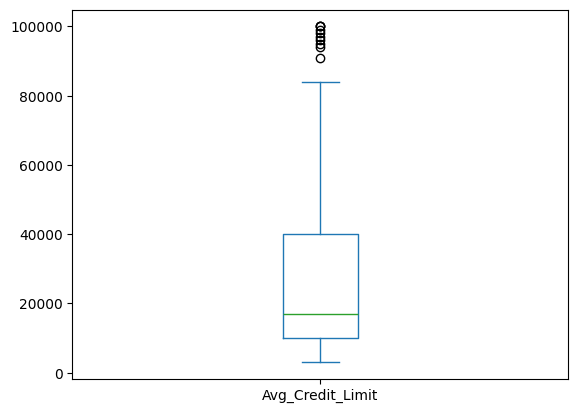

In [13]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df_in, col_name):
  df_out = df_in.copy()
  if is_numeric_dtype(df_in[col_name]):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + (iqr * 1.5)
    lower_bound = q1 - (iqr * 1.5)
    df_out = df_out.loc[(df_out[col_name] >= lower_bound) & (df_out[col_name] <= upper_bound)]
  return df_out

creditRyo2_clean = remove_outlier(df_creditRyo2, "Avg_Credit_Limit")
print("Jumlah baris DataFrame sebelum dibuang outlier:", df_creditRyo2.shape[0])
print("Jumlah baris DataFrame sesudah dibuang outlier:", creditRyo2_clean.shape[0])

creditRyo2_clean['Avg_Credit_Limit'].plot(kind='box')

  File "c:\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Python39\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


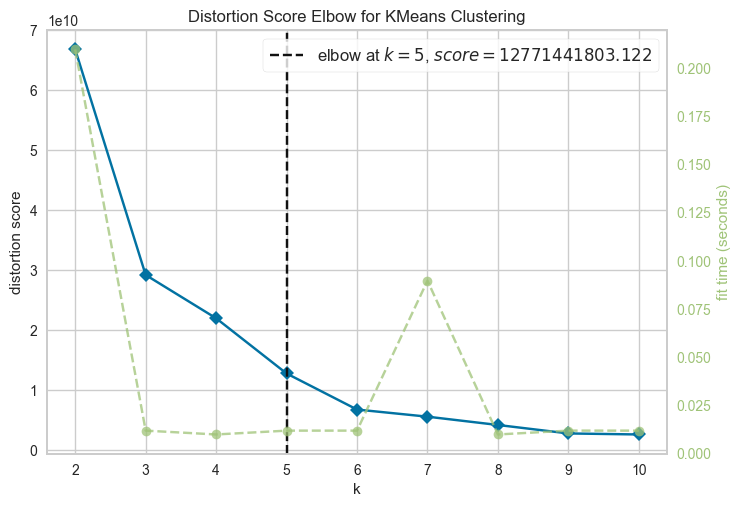

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans (random_state=13)
vis = KElbowVisualizer (kMeansC, k=(2,11))
vis.fit(creditRyo2_clean)
vis.show()

Silhouette Score K-Means for 2 clusters : 0.7254150167909509
Silhouette Score K-Means for 3 clusters : 0.7077390094589705
Silhouette Score K-Means for 4 clusters : 0.583614915246566
Silhouette Score K-Means for 5 clusters : 0.5983857186373209
Silhouette Score K-Means for 6 clusters : 0.6275885835827448
Silhouette Score K-Means for 7 clusters : 0.5946943883687696
Silhouette Score K-Means for 8 clusters : 0.577283173997759
Silhouette Score K-Means for 9 clusters : 0.6123149803893848
Silhouette Score K-Means for 10 clusters : 0.5945493214413013


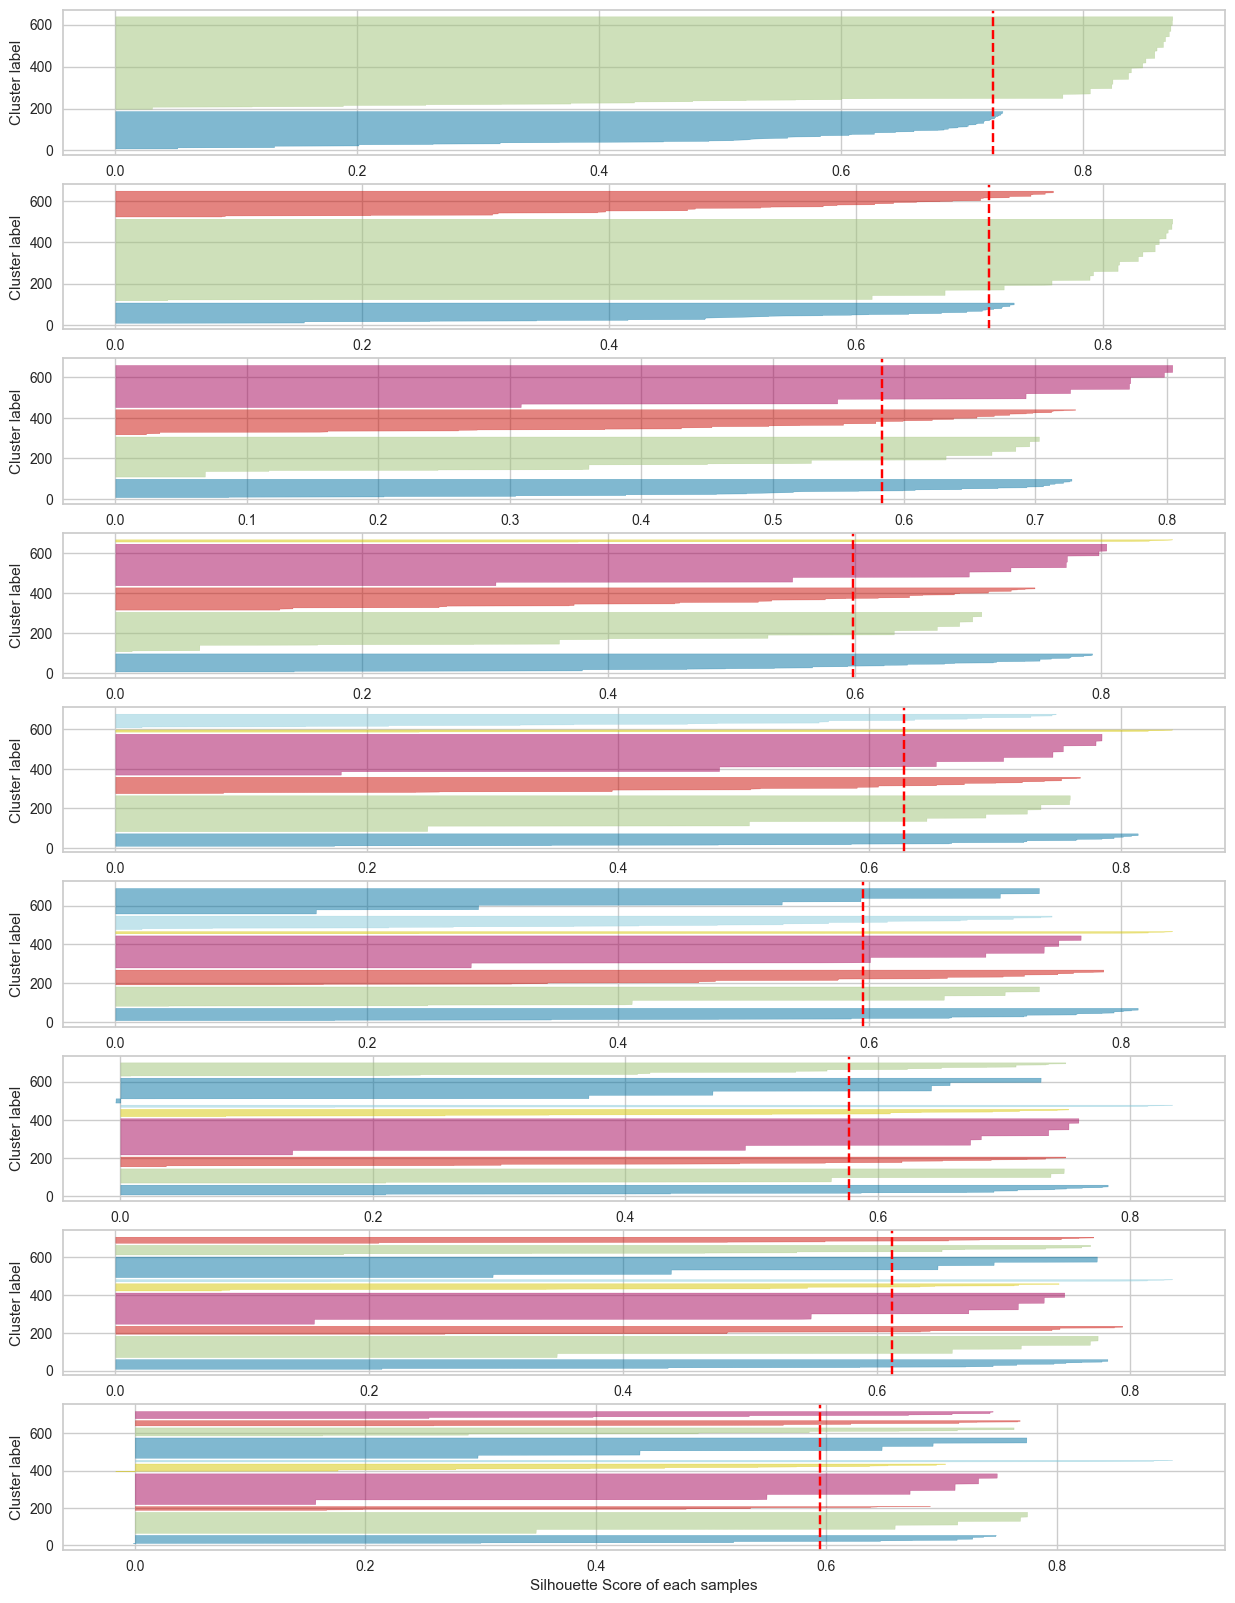

In [16]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))
for k in np.arange(2,11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=13)
    KM_clusters=kMeansC.fit_predict(creditRyo2_clean)
    print("Silhouette Score K-Means for", k, "clusters :", silhouette_score(creditRyo2_clean, KM_clusters))
    
    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(creditRyo2_clean)

    ax[k-2].set(xlabel="Silhouette Score of each samples", ylabel="Cluster label")

In [17]:
creditRyo2_clean.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

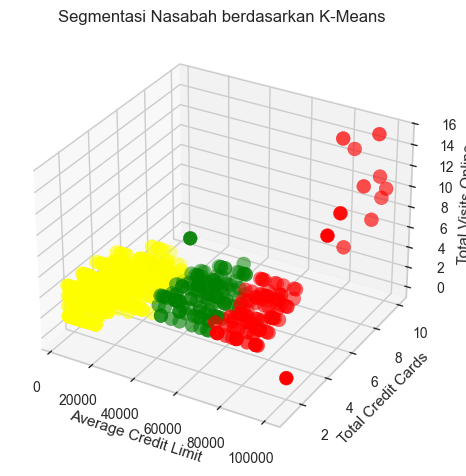

Silhouette Score K-Means: 0.708


In [18]:
kmeans= KMeans(n_clusters = 3, init='k-means++', random_state=13)
K_clusters = kmeans.fit_predict(creditRyo2_clean)

fig = plt.figure()
ax = plt.axes (projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6: 'cyan'}

ax.scatter(creditRyo2_clean['Avg_Credit_Limit'], creditRyo2_clean['Total_Credit_Cards'], creditRyo2_clean['Total_visits_online'],
c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score (creditRyo2_clean, K_clusters))

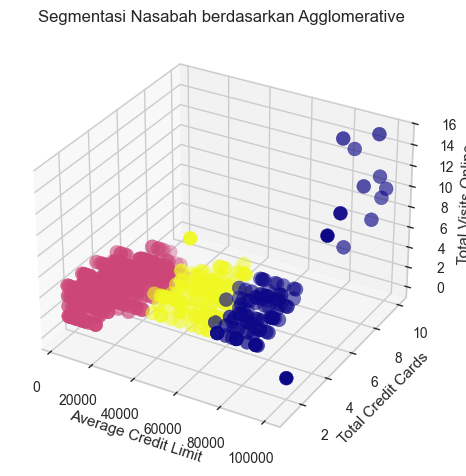

Silhouette Score Agglomerative Clustering: 0.705


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')
AGG_clusters = AGG.fit_predict(creditRyo2_clean)

cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    creditRyo2_clean['Avg_Credit_Limit'], 
    creditRyo2_clean['Total_Credit_Cards'], 
    creditRyo2_clean['Total_visits_online'],
    c=AGG_clusters, cmap=cmap, s=100
)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')

plt.show()

sil_score = silhouette_score(creditRyo2_clean, AGG_clusters)
print(f"Silhouette Score Agglomerative Clustering: {sil_score:.3f}")

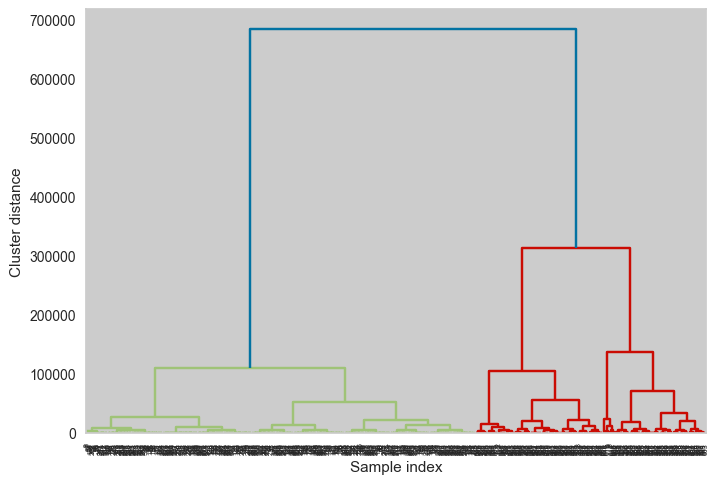

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(creditRyo2_clean,method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

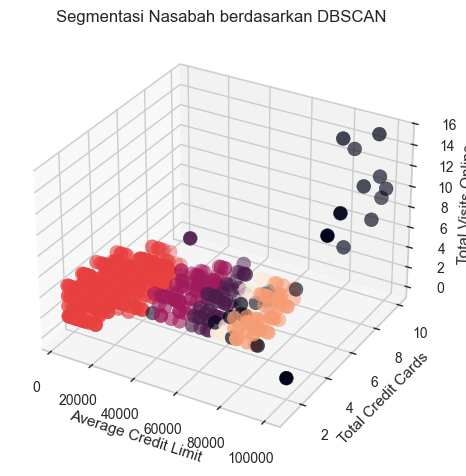

Silhouette Score K-Means: 0.657


In [22]:
DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(creditRyo2_clean)

from matplotlib.colors import ListedColormap 

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(creditRyo2_clean['Avg_Credit_Limit'], creditRyo2_clean['Total_Credit_Cards'], creditRyo2_clean['Total_visits_online'], 
           c=DBSC_clusters, cmap=cmap, s=100)  

plt.title("Segmentasi Nasabah berdasarkan DBSCAN")
ax.set_xlabel("Average Credit Limit")  
ax.set_ylabel("Total Credit Cards")    
ax.set_zlabel("Total Visits Online")  
plt.show()  


print("Silhouette Score K-Means: %0.3f" % silhouette_score(creditRyo2_clean, DBSC_clusters))

In [23]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump((DBSC),r)

print("Model berhasil disimpan")

Model berhasil disimpan
